<a href="https://colab.research.google.com/github/ZahirulNiloyCodes/Election-Dataset/blob/main/National_Election_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# @title Exploratory Data Analysis
df=pd.read_csv("/content/realistic_election_2026.csv")
df.tail(10)

,District,Literacy_Rate,Is_Urban,Muslim_Pop_Percent,Past_BNP_Vote,Past_Jamaat_Vote,Winner_Target
290,Bogra,75.3,1,95.7,59.3,28.1,BNP
291,Comilla,66.8,0,95.5,32.9,45.4,Jamaat
292,Sylhet,80.5,0,94.2,46.4,30.5,BNP
293,Lakshmipur,77.3,0,89.4,52.5,32.4,BNP
294,Dinajpur,64.5,0,89.5,46.9,43.4,Jamaat
295,Rangpur,56.5,0,91.6,35.4,31.3,BNP
296,Dinajpur,55.4,0,91.9,43.1,44.1,BNP
297,Lakshmipur,60.1,0,91.7,59.3,21.3,BNP
298,Sylhet,70.3,0,89.9,49.4,29.4,BNP
299,Rajshahi,81.8,0,93.4,48.9,45.0,BNP


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   District            300 non-null    object 
 1   Literacy_Rate       300 non-null    float64
 2   Is_Urban            300 non-null    int64  
 3   Muslim_Pop_Percent  300 non-null    float64
 4   Past_BNP_Vote       300 non-null    float64
 5   Past_Jamaat_Vote    300 non-null    float64
 6   Winner_Target       300 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 16.5+ KB


In [ ]:
df.describe()

,Literacy_Rate,Is_Urban,Muslim_Pop_Percent,Past_BNP_Vote,Past_Jamaat_Vote
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,67.948333,0.253333,93.006000,43.136667,36.842000
std,9.854033,0.435647,2.744572,8.668070,8.495395
min,50.200000,0.000000,88.000000,25.100000,20.200000
25%,59.575000,0.000000,90.800000,36.300000,30.825000
50%,68.100000,0.000000,92.900000,43.600000,37.150000
75%,76.500000,1.000000,95.400000,49.400000,43.100000
max,84.800000,1.000000,97.800000,60.000000,55.000000


<Axes: xlabel='Winner_Target', ylabel='Count'>

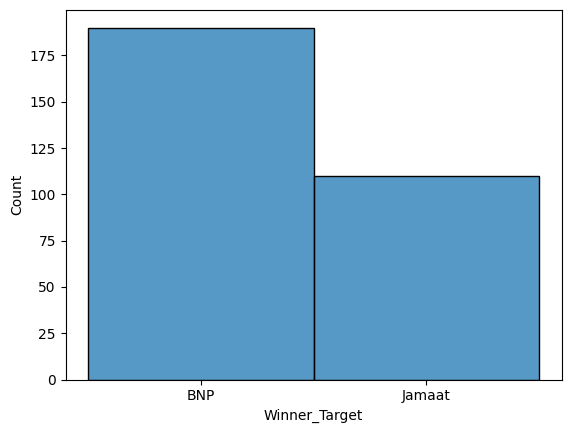

In [ ]:
sns.histplot(df['Winner_Target'])

In [ ]:
# @title Data PreProcessing
df.head(5)

,District,Literacy_Rate,Is_Urban,Muslim_Pop_Percent,Past_BNP_Vote,Past_Jamaat_Vote,Winner_Target
0,Dinajpur,50.6,0,94.8,35.2,35.4,BNP
1,Comilla,77.6,0,89.4,28.4,41.2,BNP
2,Dinajpur,53.6,0,92.2,44.7,40.9,Jamaat
3,Jessore,60.3,0,94.2,47.5,42.6,BNP
4,Lakshmipur,69.2,0,95.7,46.8,29.8,BNP


In [ ]:
x=df.drop('Winner_Target',axis=1)
y=df['Winner_Target'].copy()
x.head()

,District,Literacy_Rate,Is_Urban,Muslim_Pop_Percent,Past_BNP_Vote,Past_Jamaat_Vote
0,Dinajpur,50.6,0,94.8,35.2,35.4
1,Comilla,77.6,0,89.4,28.4,41.2
2,Dinajpur,53.6,0,92.2,44.7,40.9
3,Jessore,60.3,0,94.2,47.5,42.6
4,Lakshmipur,69.2,0,95.7,46.8,29.8


In [ ]:
x=df.drop('Winner_Target',axis=1)
y=df['Winner_Target'].copy()
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
winner=['Winner_Target']
le=LabelEncoder()
one=OneHotEncoder(sparse_output=False)
dist=['District']
ct=ColumnTransformer([('oneh', one, dist)], remainder="passthrough")
x=ct.fit_transform(x)
y=le.fit_transform(y)

In [ ]:
# @title Data Split And Feature Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("✅ Splitting & Scaling Complete!")

✅ Splitting & Scaling Complete!


In [ ]:
# @title Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mlp = MLPClassifier(hidden_layer_sizes=(64, 32),
                    activation='relu',
                    solver='adam',
                    max_iter=1000,
                    random_state=42)
print("🧠 Training Neural Network...")
mlp.fit(X_train, y_train)
print("✅ Training Complete!")
y_pred = mlp.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n🏆 Model Accuracy: {acc * 100:.2f}%")
print("\n--- Detailed Report ---")
print(classification_report(y_test, y_pred))
print("\n--- Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


🧠 Training Neural Network...
✅ Training Complete!

🏆 Model Accuracy: 78.33%

--- Detailed Report ---
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        38
           1       0.71      0.68      0.70        22

    accuracy                           0.78        60
   macro avg       0.77      0.76      0.76        60
weighted avg       0.78      0.78      0.78        60


--- Confusion Matrix:
[[32  6]
 [ 7 15]]


In [ ]:
# @title Election Results
X_full=df.drop('Winner_Target', axis=1) # The "Past" data
X_full_scaled=sc.transform(ct.transform(X_full)) # Scale it
future_predictions = mlp.predict(X_full_scaled)
predicted_winners = le.inverse_transform(future_predictions)
import pandas as pd
results = pd.Series(predicted_winners).value_counts()
print("\n🇧🇩 OFFICIAL ELECTION PREDICTION (2026) 🇧🇩")
print("="*45)
print(f"Total Constituencies: 300")
print("-" * 30)
print(f"🟢 BNP Seats:    {results.get('BNP')}")
print(f"🟠 Jamaat Seats: {results.get('Jamaat')}")
print("-" * 30)
bnp_seats=results.get('BNP')
jam_seats=results.get('Jamaat')
if bnp_seats >= 151:
    print(f"🏆 RESULT: BNP forms the government with a majority!")
elif jam_seats >= 151:
    print(f"🏆 RESULT: Jamaat forms the government with a majority!")
else:
    print(f"⚖️ RESULT: Hung Parliament! (Coalition needed)")


🇧🇩 OFFICIAL ELECTION PREDICTION (2026) 🇧🇩
Total Constituencies: 300
------------------------------
🟢 BNP Seats:    191
🟠 Jamaat Seats: 109
------------------------------
🏆 RESULT: BNP forms the government with a majority!
